<style type="text/css">

h1.title {
  font-size: 38px;
  color: black;
  text-align: center;
  background-color:#e6f0ff; border-radius: 5px; padding: 20px;
  
}

h3 {
  color: black;
  text-align: center;
  background-color:#e6f0ff; border-radius: 5px; padding: 20px;
}

</style>


O primeiro jogo foi lançado em agosto de 1972, jogos da primeira geração eram desenvolvidos para um único console e o primeiro pertencia ao Magnavox Odyssey criado por Ralph Baer, o console ficou conhecido como Brown Box e o jogo consistia em um simples jogo de ping pong.

O projeto final da disciplina de Tecnologia da Informação realizado pelo aluno ***Fabrício Cavalcante Costa de Souza*** é fundamentado em uma base que contém dados de jogos exclusivos de consoles desde de 1980 até 2016, chamada de ***Vídeo Game Sales***, com informações sobre seu; ano de estreia no mercado, empresa desenvolvedora e editora, plataforma, gênero, vendas na América do Norte, Europa, Japão e o resto do mundo, vendas globais, nota que o jogo recebeu por críticos, nota que o jogo recebeu pelos jogadores, números de críticos e jogadores que colaboraram para a formação das notas, respectivamente, e classificação etária.

Estas características se encontram da seguinte maneira na base de dados (acompanhadas de seus resumos):

* Name: Nome do jogo
* Platform: Console no qual o jogo está sendo executado
* Year_of_Release: Ano do jogo lançado
* Genre: Categoria do jogo
* Publisher: Parte responsável por publicar o jogo
* NA_Sales: Vendas de jogos na América do Norte (em milhões de unidades)
* EU_Sales: Vendas de jogos na União Européia (em milhões de unidades)
* JP_Sales: Vendas de jogos no Japão (em milhões de unidades)
* Other_Sales: Vendas de jogos no resto do mundo, ou seja, na África, Ásia, excluindo o Japão, a Austrália, a Europa, excluindo a UE e a América do Sul (em milhões de unidades)
* Global_Sales:Total de vendas no mundo (em milhões de unidades)
* Critic_Score: Pontuação agregada compilada pela equipe Metacritic
* Critic_Count: O número de críticos usados na criação do Critic_score
* User_Score: Pontuação dos assinantes do Metacritic
* User_Count: Número de usuários que deram o user_score
* Developer: Parte responsável por criar o jogo
* Rating: As classificações ESRB (por exemplo, todos, adolescentes, adultos apenas, etc.)

## Carregando as Bibliotecas


In [76]:
#if(!require(tidyverse)){
#    install.packages("tidyverse")
#    library(tidyverse)
#}

if(!require(ggrepel)){
    install.packages("ggrepel")
    library(ggrepel)
}

if(!require(gridExtra)){
    install.packages("gridExtra")
    library(gridExtra)
}

if(!require(plyr)){
    install.packages("plyr")
    library(plyr)
}


In [79]:
library(readr)
library(dplyr)
library(tidyr)
install.packages("data.table")
data.table::update.dev.pkg()
library(data.table)
library(stringr)
library(magrittr)
library(ggplot2)
library(plotly)
library(caret)
library(randomForest)
library(DataExplorer)


Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)
Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


R data.table package has been updated to b1b1832b0d2d4032b46477d9fe6efb15006664f4 (1.12.9)


ERROR: Error: package or namespace load failed for ‘DataExplorer’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘data.table’ 1.12.2 is already loaded, but >= 1.12.8 is required


YesYes
## Base de Dados


In [ ]:
## apagar para exibir
#df <- read.csv(file.choose(),stringsAsFactors = FALSE, sep =",")
link <- "~/library/Video_Games_Sales.csv"
df <- read.csv(link, stringsAsFactors = FALSE, sep =",")



Essas são as primeiras 6 linhas de 16.719 da base de dados utilizada.


In [ ]:
head(df)



In [ ]:
glimpse(df)

summary(df)



## Limpandos os campos


In [ ]:
ind <- which(is.na(df$Critic_Score))
df$Critic_Score[ind] <- 0


In [ ]:
ind <- which(is.na(df$Critic_Count))
df$Critic_Count[ind] <- 0


In [ ]:
df$User_Score[df$User_Score == 'tbd' & !is.na(df$User_Score)] <- NA
df$User_Score <- as.numeric(as.character(df$User_Score))
df$User_Score[is.na(df$User_Score)] <- 0


In [ ]:
ind <- which(is.na(df$User_Count))
df$User_Count[ind] <- 0


In [ ]:
x3 <- sample(2000:2016, 269,replace = TRUE)
x3 <- as.vector(x3)
df$Year_of_Release[df$Year_of_Release == 'N/A'] <- NA
ind <- which(is.na(df$Year_of_Release))
df$Year_of_Release[ind] <- x3


In [37]:
df$Developer[df$Developer == ''] <- NA
ind <- which(is.na(df$Developer))


In [38]:
df$Rating[df$Rating == ''] <- NA



In [39]:
df$Critic_Score <- df$Critic_Score/10
df$Year_of_Release <- as.integer(df$Year_of_Release)
glimpse(df)


Observations: 16,719
Variables: 16
$ Name            <chr> "Wii Sports", "Super Mario Bros.", "Mario Kart Wii", …
$ Platform        <chr> "Wii", "NES", "Wii", "Wii", "GB", "GB", "DS", "Wii", …
$ Year_of_Release <int> 2006, 1985, 2008, 2009, 1996, 1989, 2006, 2006, 2009,…
$ Genre           <chr> "Sports", "Platform", "Racing", "Sports", "Role-Playi…
$ Publisher       <chr> "Nintendo", "Nintendo", "Nintendo", "Nintendo", "Nint…
$ NA_Sales        <dbl> 41.36, 29.08, 15.68, 15.61, 11.27, 23.20, 11.28, 13.9…
$ EU_Sales        <dbl> 28.96, 3.58, 12.76, 10.93, 8.89, 2.26, 9.14, 9.18, 6.…
$ JP_Sales        <dbl> 3.77, 6.81, 3.79, 3.28, 10.22, 4.22, 6.50, 2.93, 4.70…
$ Other_Sales     <dbl> 8.45, 0.77, 3.29, 2.95, 1.00, 0.58, 2.88, 2.84, 2.24,…
$ Global_Sales    <dbl> 82.53, 40.24, 35.52, 32.77, 31.37, 30.26, 29.80, 28.9…
$ Critic_Score    <dbl> 0.76, 0.00, 0.82, 0.80, 0.00, 0.00, 0.89, 0.58, 0.87,…
$ Critic_Count    <dbl> 51, 0, 73, 73, 0, 0, 65, 41, 80, 0, 0, 64, 0, 63, 45,…
$ User_Score     

Nessa parte realizamos a limpeza do dados, transformando os espaços vazios em NAs (falta de dado), preenchendo o campo dos anos e modificando a  coluna de Critic_Score para ficar compatível com User_Score.

### 1.Vendas totais ao redor do mundo para Publisher


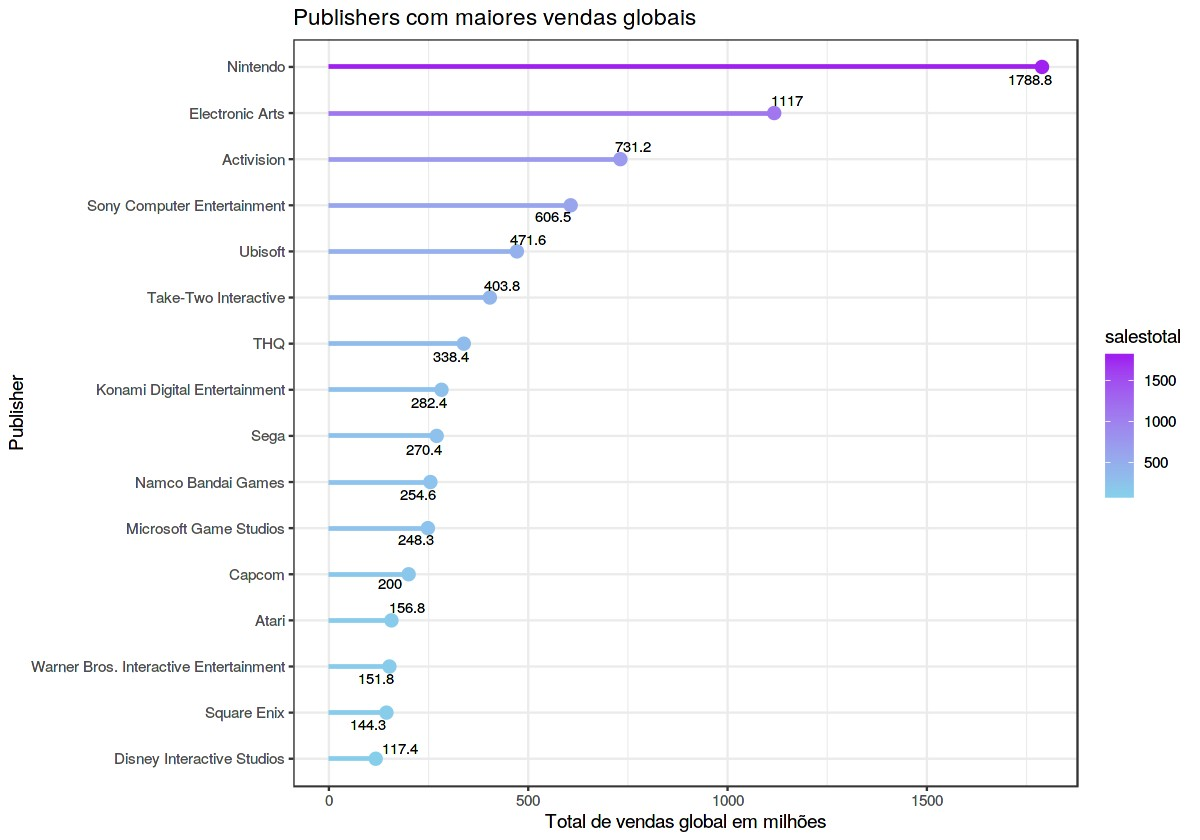

In [40]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=10, repr.plot.height=7)

pub = df %>%
    group_by(Publisher) %>%
    dplyr::summarize(total=n(), salestotal=round(sum(Global_Sales),1), 
                    salesjp=round(sum(JP_Sales),1),
                    salesna=round(sum(NA_Sales),1),
                    saleseu=round(sum(EU_Sales),1),
                    other=round(sum(Other_Sales),1)) 


ggplot(pub[pub$salestotal>100,], aes(x=reorder(Publisher,salestotal), y=salestotal)) +
    geom_point(aes(color=salestotal), shape=19, size=3)+
    scale_color_gradient(low="skyblue", high="purple")+
    geom_segment(aes(x=Publisher, xend=Publisher, y=0,yend=salestotal, color=salestotal), 
                 size=1) + 
    theme(legend.position="top")+
    labs(title="Publishers com maiores vendas globais", x= "Publisher", 
         y= "Total de vendas global em milhões") +
    theme_bw()+
    geom_text_repel(aes(label=salestotal),size=3,data=pub[pub$salestotal>100,],color="black")+ 
    coord_flip()


Como são mais de 500 Publisher, somente os Publisher com vendas totais superiores à 100 milhões de unidades foram analisados. Vemos aqui que a Nintendo é umas da que mais fatura.


### 2.Vendas totais ao redor do mundo para cada classificação etária


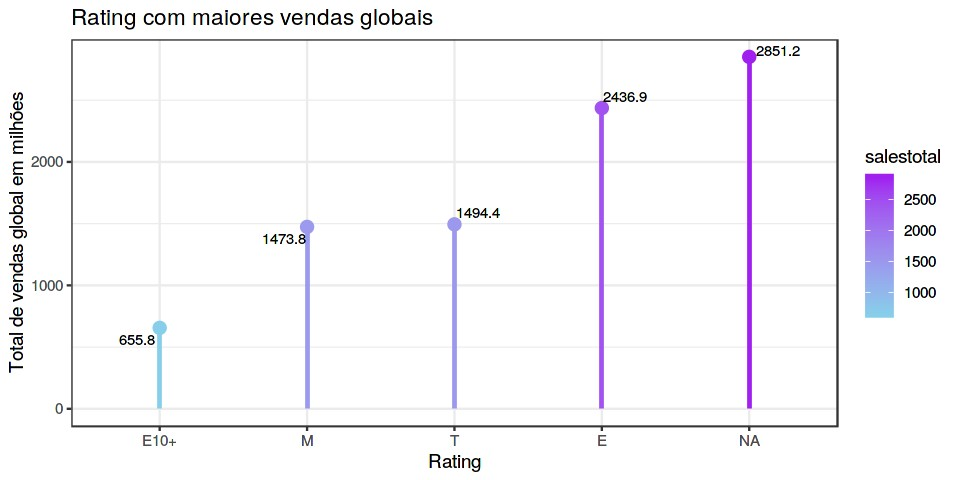

In [41]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=8, repr.plot.height=4)

pub = df %>%
    group_by(Rating) %>%
    dplyr::summarize(total=n(), salestotal=round(sum(Global_Sales),1), 
                    salesjp=round(sum(JP_Sales),1),
                    salesna=round(sum(NA_Sales),1),
                    saleseu=round(sum(EU_Sales),1),
                    other=round(sum(Other_Sales),1)) 

ggplot(pub[pub$salestotal>100,], aes(x=reorder(Rating,salestotal), y=salestotal)) +
    geom_point(aes(color=salestotal), shape=19, size=3)+
    scale_color_gradient(low="skyblue", high="purple")+
    geom_segment(aes(x=Rating, xend=Rating, y=0,yend=salestotal, color=salestotal), 
                 size=1) + 
    theme(legend.position="top")+
    labs(title="Rating com maiores vendas globais", x= "Rating", 
         y= "Total de vendas global em milhões") +
    theme_bw()+
    geom_text_repel(aes(label=salestotal),size=3,data=pub[pub$salestotal>100,],
                    color="black")


As classificações etárias são os dados com maior número de NAs, tornando o NA campeã  das  vendas totais. A análise novamente foi feita com mais de 100 milhões de unidades por conta de algumas classificações não possuir sequer 10 milhões de unidades.


### 3.Vendas totais dos jogos através dos anos


In [42]:
yearly <- df %>%
    group_by(Year_of_Release) %>%
    dplyr::summarize(numrelease=n(),Japao=sum(JP_Sales), America_do_Norte=sum(NA_Sales),
                     Europa=sum(EU_Sales),Outros=sum(Other_Sales), 
                    Global=sum(Global_Sales)) 

yearly$Year_of_Release = as.numeric((yearly$Year_of_Release))
yearly <- yearly[!(is.na(yearly$Year_of_Release)),]
yearly <- subset(yearly, yearly$Year_of_Release!=2017)
yearly <- subset(yearly, yearly$Year_of_Release!=2020)


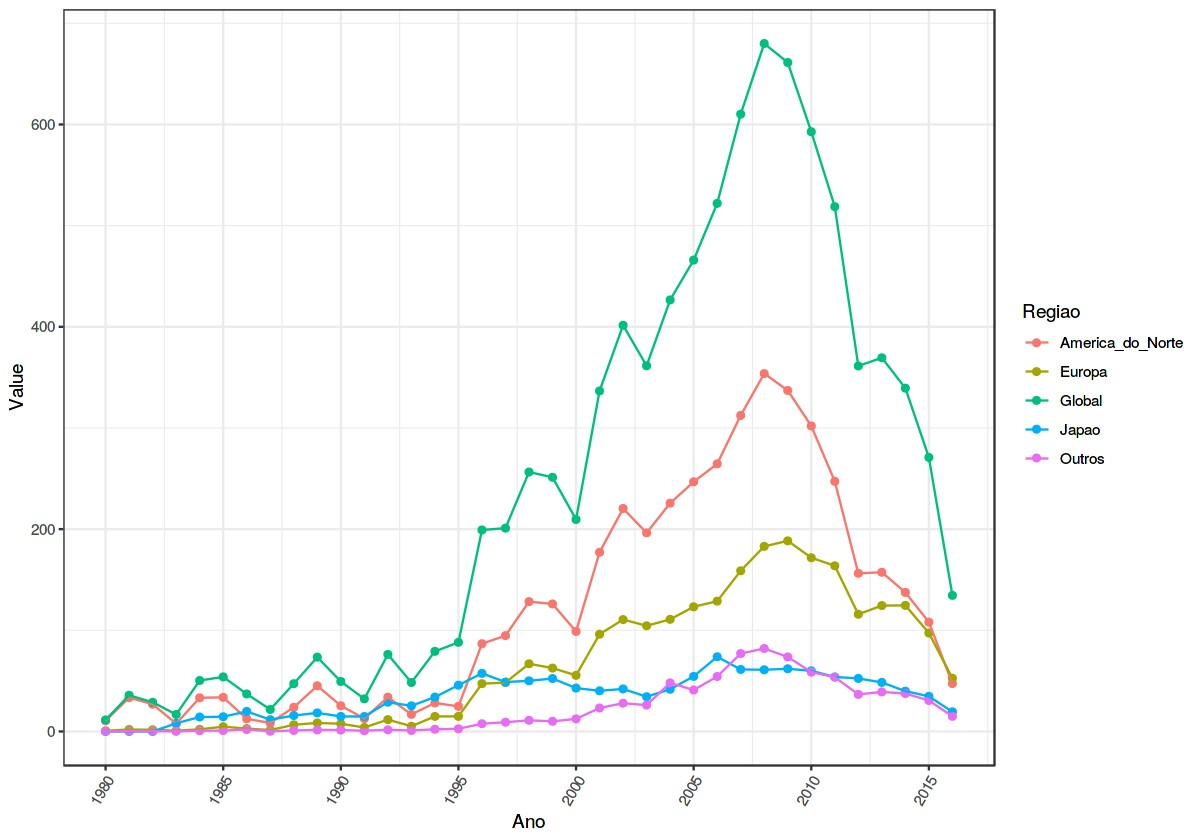

In [43]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=10, repr.plot.height=7)
years <- yearly %>% 
  gather(Regiao, Value, -c(Year_of_Release, numrelease)) %>% 
  arrange(Regiao)

ggplot(years, aes(x=Year_of_Release, y=Value, color=Regiao))+
    geom_point()+
    geom_line()+
    theme_bw()+
    theme(axis.text.x = element_text(angle=60, hjust=1)) +
    scale_x_continuous("Ano", breaks = seq(from = 1980, to = 2016, by = 5))


Por erro de digitação o ano 2020 aparece entre os jogos, sendo assim ele foi eliminado na análise, assim como 2017 por não conter dados completos do ano. Na análise os dados de anos foi modificado para númerico já que na base de dados ele veio como caracter. É possivel notar que no periodo de 1995 até 2015 houve uma crescente nas vendas.

### 4.Qual o gênero com com a maior quantidade de jogos publicados?


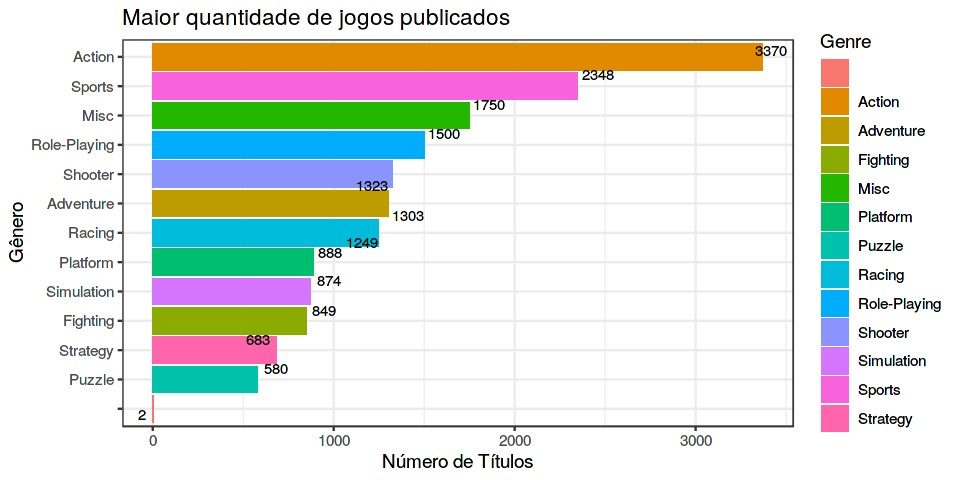

In [44]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=8, repr.plot.height=4)

temp1 <- aggregate(Global_Sales~Genre, data=df, FUN=length)
temp2 <- aggregate(Global_Sales~Genre, data=df, FUN=sd)

colnames(temp1)[2] <- "Número de Títulos"
colnames(temp2)[2] <- "Vendas Globais"

temp3 <- merge(temp1,temp2, id="Gênero")
temp3 <- temp3[order(-temp3[2]),]

ggplot(temp3, aes(x=reorder(Genre, temp3$`Número de Títulos`), y = temp3$`Número de Títulos`,fill = Genre)) +geom_bar(stat = "identity") +
  geom_text_repel(aes(label=temp3$`Número de Títulos`),size=3,color="black")+ 
  labs(title="Maior quantidade de jogos publicados", x= "Gênero", y= "Número de Títulos") +
  theme_bw()+
  coord_flip()


O único gênero não nomeado é o gênero sem classificação determinada que veio na base de dados.Verificamos aqui que jogos de ação, sport e variados possuem a maior quantidade de títulos.

### 5.Influência nas vendas pelo gênero de jogos


In [45]:
gsale <- aggregate(Global_Sales~Genre, data=df, FUN=sd)
gsale <- gsale[order(-gsale$Global_Sales),]
names(gsale) <- c("Genero","Vendas_Globais")
gsale$Vendas_Globais <- round(gsale$Vendas_Globais,2)


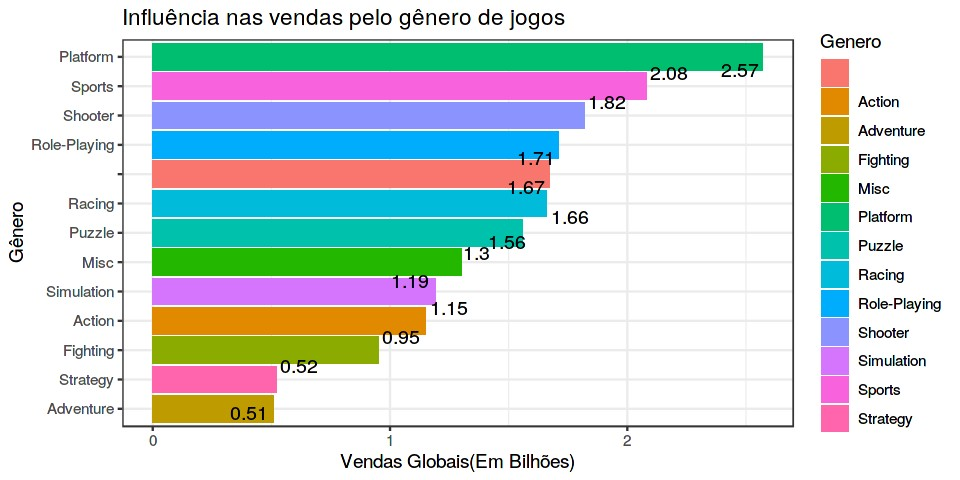

In [46]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=8, repr.plot.height=4)


ggplot(gsale, aes(x= reorder(Genero, gsale$`Vendas_Globais`) , y = gsale$`Vendas_Globais` ,fill = Genero)) +
    geom_bar(stat = "identity") +
    geom_text_repel(aes(label=Vendas_Globais),size=4,color="black")+
    labs(title="Influência nas vendas pelo gênero de jogos", x= "Gênero", y= "Vendas Globais(Em Bilhões)") +
    theme_bw()+
    coord_flip()


Como na pergunta anterior, o gênero que está com o espaço vazio é o gênero sem classificação. Vemos aqui que o campeão em vendas são os jogos de Plataforma, mesmo tendo a quantidade de jogos menor que os jogos de ação.


### 6.Publisher com o maior número de jogos produzidos


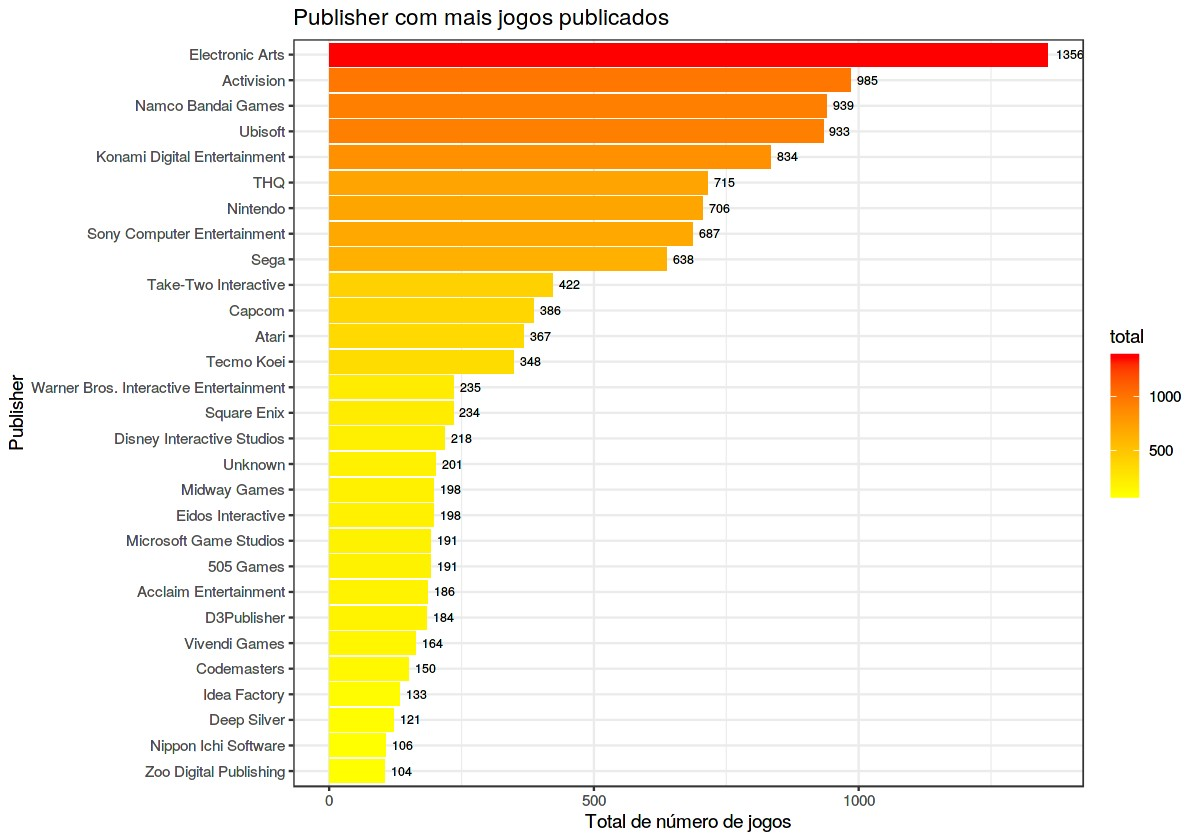

In [47]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=10, repr.plot.height=7)

totalplup= df %>%
    group_by(Publisher) %>%
    dplyr::summarize(total=n())

ggplot(totalplup[totalplup$total>100,], aes(x=reorder(Publisher,total), y=total, fill=total))+
    geom_bar(stat="identity") +
    scale_color_gradient(low="yellow", high="red")+
    scale_fill_gradient(low="yellow", high="red")+
    labs(title="Publisher com mais jogos publicados", x="Publisher", y="Total de número de jogos")+
    geom_text(aes(label=total), hjust=-0.3, size=2.5)+
    theme(legend.position="none")+
    theme_bw()+
    coord_flip()


Seguindo à lógica de tornar à análise menos extensa, somente os Publisher com número de jogos feitos maior do que 100 entraram na avaliação. Aqui Eletronic Arts sai em primeiro lugar, ja que ela é uma das principais no desenvolvimento de jogos de sports, ação e shooter.


### 7.Os jogos mais bem avaliados


In [48]:
totalaval= df %>%
    select(Name, Critic_Score, User_Score) %>%
    filter(Critic_Score > 9.5) 

totalaval <- totalaval[order(totalaval$Critic_Score, decreasing= TRUE),]
totalaval %<>% distinct(Name, .keep_all = TRUE)


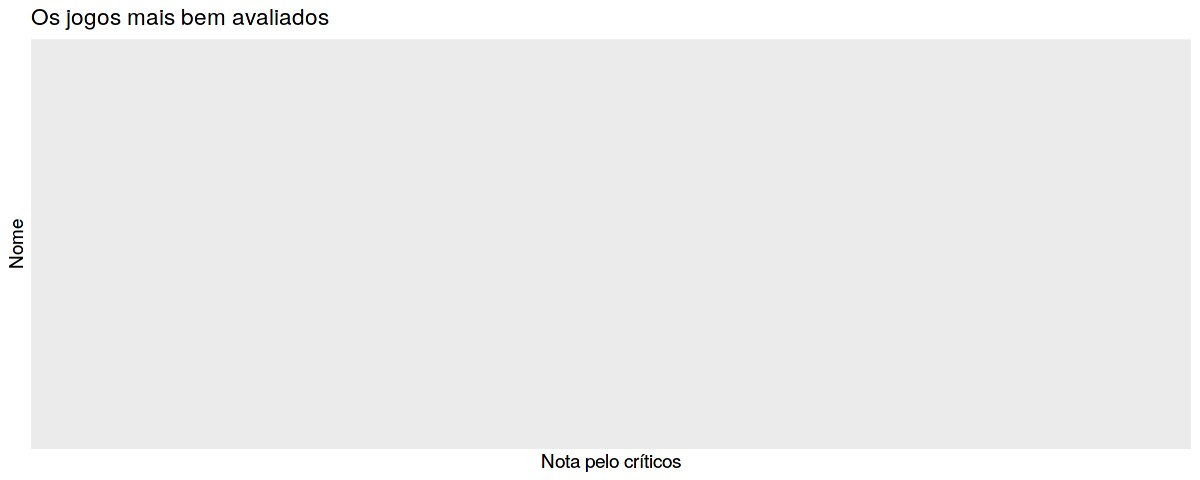

In [49]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=10, repr.plot.height=4)

ggplot(totalaval, aes(x= reorder(Name, totalaval$`Critic_Score`), y = totalaval$`Critic_Score`,fill = Name)) +
    geom_bar(stat = "identity") +
    geom_text_repel(aes(label=totalaval$`Critic_Score`),size=3,color="black")+
    theme(legend.position="none") +
    labs(title="Os jogos mais bem avaliados", x= "Nome", y= "Nota pelo críticos") +
    coord_flip()
    


A  avaliação se baseou somente no Critic_Score maior que 9,5 por conta da quantidade de jogos que aparecem e também por conta do número de avaliadores, com o User_Score, alguns jogos recebe nota alta, porém só tem um único avaliador, por conta disso esta avaliação foi descartada. 


### 8.Uma boa avaliação influencia nas vendas?


In [50]:
venaval= df %>%
    select(Name, Critic_Score, Global_Sales) %>%
    filter(Critic_Score > 9.5) %>% 
    distinct(Name, .keep_all = TRUE)
venaval <- venaval[order(venaval$Critic_Score, decreasing= TRUE),]


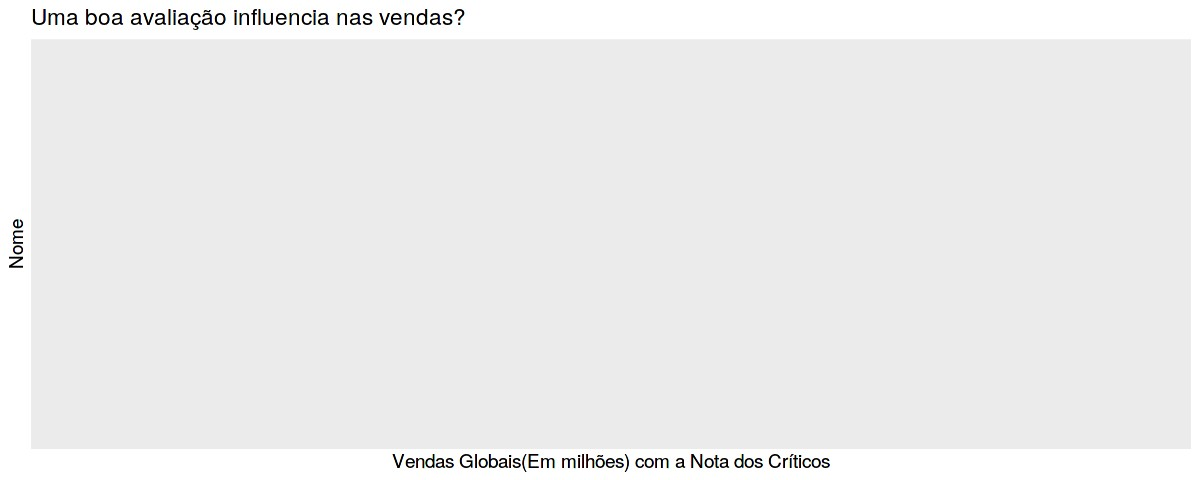

In [51]:
ggplot(venaval, aes(x=reorder(Name, venaval$`Global_Sales`), y = venaval$`Global_Sales`, fill = Name)) +
    geom_bar(stat = "identity") +
    geom_text_repel(aes(label=venaval$Critic_Score),size=3,color="black") +
    theme(legend.position="none") +
    labs(title="Uma boa avaliação influencia nas vendas?", x= "Nome", y= "Vendas Globais(Em milhões) com a Nota dos Críticos") +
    coord_flip()


Novamente o critério de somente Critic_Score entrou na avaliação por conta de ter mais um avaliador, diferente do User_Score.


### 9. Qual a plataforma com a maior quantidade de venda?


In [52]:
plat= df %>%
    group_by(Platform) %>%
    dplyr::summarize(total=n(), salestotal=round(sum(Global_Sales),1)) %>%
    filter(salestotal > 100.0)

plat <- plat[order(plat$salestotal, decreasing= TRUE),]               


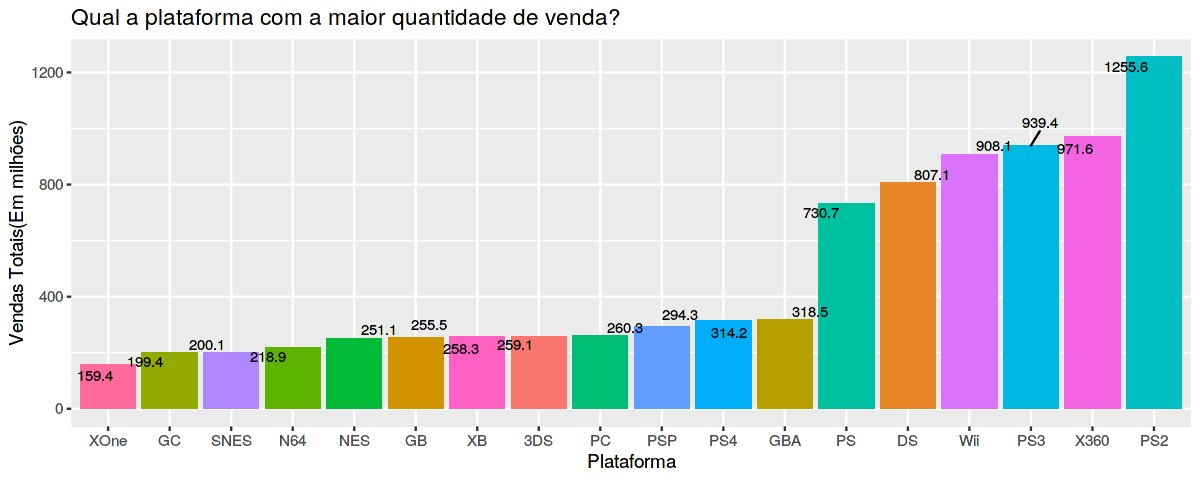

In [53]:
options(jupyter.plot_mimetypes = c('image/jpeg', 'image/svg+xml'))
options(repr.plot.width=10, repr.plot.height=4)


ggplot(plat, aes(x=reorder(Platform, plat$`salestotal`), y = plat$`salestotal`, fill = Platform)) +
    geom_bar(stat = "identity") +
    geom_text_repel(aes(label=plat$`salestotal`),size=3,color="black") +
    theme(legend.position="none") +
    labs(title="Qual a plataforma com a maior quantidade de venda?", x= "Plataforma", y= "Vendas Totais(Em milhões)")


Os jogos possuem dados desde 1980, então é normal ter plataforma antigas, para uma análise melhor foi retirado todas as plataformas com menos de 100 milhões de unidades, tornando o gráfico bem menos denso. Aqui podemos notar que o PS2 teve uma quantidade enorme de vendas, ultrapassando até mesmo seu sucessor o PS3 e superando um outro console com poder de processamento superior Xbox 360.

## Extras - Parte 4 - Regressão & Random Forest


In [54]:
DataExplorer::plot_correlation(df[,sapply(df, is.numeric)])



ERROR: Error in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]): namespace ‘data.table’ 1.12.2 is already loaded, but >= 1.12.8 is required


Mapa de correlação dos dados, nesse gráfico, tentamos encontrar variáveis que tenham uma correlação.

### Modelo de Treino


In [ ]:
set.seed(123)
ps3set <- subset(df, Platform=="PS3")
index <- sample(1:nrow(ps3set),size = 0.7*nrow(ps3set)) 
ps3set.train <- ps3set[index,]
ps3set.test <- ps3set[-index,]


Vamos dividir a base em um modelo de teste e treino e tentar prever algo relevante com base nas nossas variáveis, para tentarmos ser mais precisos, usamos a Plataforma "PS3" e vamos utilizar dois algortimos de machine learning, regressão linear e random forest para tentar verificar se os resultados permanecem iguais no fim.

### Regressão Linear


In [ ]:
ps3.lm <- lm(formula= NA_Sales ~ User_Count +
            User_Score + Critic_Count + Critic_Score +
            Year_of_Release, data=ps3set.train)
summary(ps3.lm)


Tivemos que usar mais de uma variável para que nosso modelo tivesse relevância e para que pudessemos ajustar o R-Squared para um valor aceitável.



In [ ]:
ps3.lmimp <- varImp(ps3.lm)
ps3.lmimp <- ps3.lmimp[order(-ps3.lmimp$Overall),, drop=FALSE]

ps3set.test.predlm <- exp(predict(ps3.lm,ps3set.test))-1


Criamos uma tabela de importância para o modelo linear e realizamos a previsão através do predict

### Random Forest


In [ ]:
ps3.rf <- randomForest(NA_Sales ~ User_Count + User_Score + Critic_Count + Critic_Score +
            Year_of_Release, data = ps3set.train, importance = TRUE)


Usamos um outro algoritmo chamado random forest que através de nossas variáveis passada, faz diversas combinações para que consiga encontrar o modelo com a maior acurácia e mais precisão.



In [ ]:
ps3.rfimp <- as.data.frame(sort(importance(ps3.rf)[,1],decreasing = TRUE),optional = T)
names(ps3.rfimp) <- "PS3 %"


Realizamos o mesmo processo de construção das tabelas de importância, mas agora para o modelo de random forest.



In [ ]:
ps3set.test.predrf <- predict(ps3.rf,ps3set.test)



Realizamos a previsão chamando a função predict para o random forest.



In [ ]:
ps3set.allpred <- data.frame(Atual = ps3set.test$NA_Sales,
                              linear.regression = ps3set.test.predlm,
                              random.forest = ps3set.test.predrf)
ps3set.allpred <- gather(ps3set.allpred,key = model,value = Previsoes,2:3)


Realizamos a união dos modelos de regressão linear e random forest com base na variável NA_Sales e também para que possamos plotar no ggplot de forma mais clara.

### Plotando no ggplot os dois modelos


In [ ]:
grafico <- ggplot(data = ps3set.allpred,aes(x = Atual, y = Previsoes)) + 
  geom_point(colour = "blue") + 
  geom_abline(intercept = 0, slope = 1, colour = "red") +
  facet_wrap(~ model,ncol = 2) + 
  coord_cartesian(ylim = c(0, 6)) +
  ggtitle("PS3 - Dados previstos e reais por modelo realizado")

grafico



Como podemos ver, o modelo random forest foi o que melhor se adaptou ao nosso modelo.
